![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [75]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [4]:
df_beer = pd.read_csv('data/datasets_beers.csv') # index_col
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [6]:
df_beer.drop(columns=['Unnamed: 0'], inplace=True)
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [7]:
df_beer.to_csv('prueba.csv')

In [8]:
df_prueba = pd.read_csv('prueba.csv')

In [9]:
df_prueba.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [10]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [11]:
df_beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [18]:
df_beer.shape

(2410, 7)

In [14]:
len(df_beer)

2410

In [15]:
len(df_beer.columns)

7

## Ejercicio 5
¿De qué tipo son los datos?

In [19]:
df_beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuartiles...

In [24]:
df_describe = df_beer[['abv','ibu','ounces']].describe()
df_describe

,abv,ibu,ounces
count,2348.000000,1405.000000,2410.000000
mean,0.059773,42.713167,13.592241
std,0.013542,25.954066,2.352204
min,0.001000,4.000000,8.400000
25%,0.050000,21.000000,12.000000
50%,0.056000,35.000000,12.000000
75%,0.067000,64.000000,16.000000
max,0.128000,138.000000,32.000000


In [25]:
df_describe = df_beer[['abv','ibu','ounces']].agg(['mean','count'])
df_describe

,abv,ibu,ounces
mean,0.059773,42.713167,13.592241
count,2348.000000,1405.000000,2410.000000


In [23]:
df_describe = df_beer.agg(
        {
            "abv" : ['mean','count'],
            "ibu" : ['mean','max','count'],
            "ounces" : ['mean','max','count','min']
        }
)

df_describe

,abv,ibu,ounces
mean,0.059773,42.713167,13.592241
count,2348.000000,1405.000000,2410.000000
max,NaN,138.000000,32.000000
min,NaN,NaN,8.400000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [28]:
df_beer['style'].value_counts()[0:10]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

In [33]:
df_beer.groupby('style')[['name']].count().sort_values('name', ascending=False)[0:10]

,name
style,
American IPA,424
American Pale Ale (APA),245
American Amber / Red Ale,133
American Blonde Ale,108
American Double / Imperial IPA,105
American Pale Wheat Ale,97
American Brown Ale,70
American Porter,68
Saison / Farmhouse Ale,52


In [34]:
len(df_beer['style'].unique())

100

In [35]:
df_beer[df_beer['style'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces
566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


In [36]:
df_beer['style'].nunique()

99

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [37]:
df_beer.iloc[9:20,:]

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [38]:
df_beer.iloc[9:20,3:]

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [41]:
df_beer[['abv','ibu','ounces']].iloc[9:20]

,abv,ibu,ounces
9,0.086,NaN,12.0
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0


In [42]:
df_beer[['abv','ibu','ounces']].iloc[9:20].values

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [43]:
df_beer[['abv','ibu','ounces']].iloc[9:20].to_numpy()

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [44]:
df_beer[['abv','ibu','ounces']].iloc[9:20].shape

(11, 3)

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [45]:
df_beer['ounces'].sum()

32757.3

In [49]:
df_beer.groupby('style')[['ounces']].mean().sort_values('ounces', ascending=True)[0:10]

,ounces
style,
American Barleywine,10.8
Abbey Single Ale,12.0
Braggot,12.0
English Pale Mild Ale,12.0
Euro Pale Lager,12.0
Foreign / Export Stout,12.0
Grisette,12.0
Kristalweizen,12.0
Old Ale,12.0


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [51]:
round(df_beer['ibu'].mean(), 2)

42.71

In [52]:
print("Maximo", df_beer['ibu'].max())
print("Minimo", df_beer['ibu'].min())

Maximo 138.0
Minimo 4.0


In [62]:
df_beer[df_beer['ibu'] == df_beer['ibu'].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [63]:
df_beer[df_beer['ibu'] == df_beer['ibu'].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [65]:
len(df_beer)

2410

In [66]:
1405/2410

0.58298755186722

In [64]:
df_beer[['ibu']].describe()

,ibu
count,1405.000000
mean,42.713167
std,25.954066
min,4.000000
25%,21.000000
50%,35.000000
75%,64.000000
max,138.000000


In [67]:
print(df_beer['ibu'].var())
print(df_beer['ibu'].std())

673.6135373259929
25.954065911259317


In [73]:
stats.kurtosis(df_beer[df_beer['ibu'].notna()]['ibu'])

-0.1394969855232815

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [74]:
df_beer.corr()

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


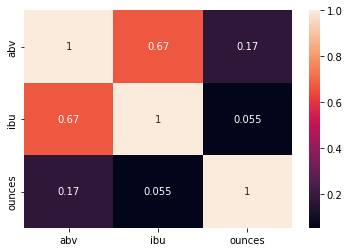

In [83]:
sns.heatmap(df_beer[['abv','ibu','ounces']].corr(), annot=True);

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

## Ejercicio 18
Junta los dos datasets que tienes

## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media